<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Dim_reduct_PCA_KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# импорт
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
%matplotlib inline

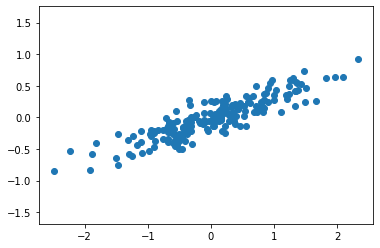

In [6]:
# генерация двумерных данных
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
# преобразование в заданное кол-во измерений
# создание экземпляра PCA
pca = PCA(n_components=2,           # сжать до 2 измерений (фичей)
          whiten=True,              # стандартизировать после сжатия
          svd_solver='randomized',  # тип разложения SVD
          random_state=42)
# стандартизация данных
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# обучение
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=True)

In [8]:
# вывод координат главных компонент, векторы ортогональны,
# так и должно быть - сингулярные векторы пересекаются под прямым углом
pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [9]:
# и величину объясненной дисперсии для каждой из них
# причем это процентное соотношение
pca.explained_variance_ratio_

array([0.94469498, 0.05530502])

In [10]:
# а это абсолютное значение, мало пригодно
pca.explained_variance_

array([1.89888438, 0.11116588])

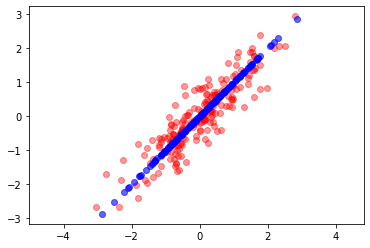

In [11]:
# сжатие до 1 измерения и сравнение с исходными данными
# создание нового экземпляра
pca_1 = PCA(n_components=1)
# обучение и трансформация
pca_1.fit(X_std)
X_pca_1 = pca_1.transform(X_std)
# обратная транформация
X_pca_1 = pca_1.inverse_transform(X_pca_1)
# печать
plt.scatter(X_std[:, 0], X_std[:, 1], c='red', alpha=0.4)
plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1], c='b', alpha=0.6)
plt.axis('equal');

In [12]:
# сжатие до определенного размера объясненной дисперсии
# загрузка данных о раке груди
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
# и стандартизируем
scaler = StandardScaler()
X_std_30 = scaler.fit_transform(X)

In [13]:
# размерность - 30 фичей
X_std_30.shape

(569, 30)

In [14]:
# сжатие до 99% дисперсии
pca_99 = PCA(n_components=0.99, # можно установить None - вернет все компоненты
             whiten=True,
             random_state=42)
pca_99.fit(X_std_30)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=42,
    svd_solver='auto', tol=0.0, whiten=True)

In [15]:
# сколько фичей из 30 осталось - 17
pca_99.n_components_

17

In [16]:
# сколько дали первые 5 фичей
pca_99.explained_variance_ratio_[:5]

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

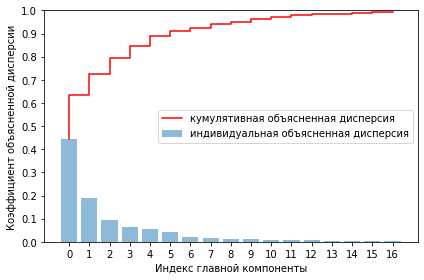

In [17]:
# вывод графика накопленной дисперсии для прнятия решения о точке отсечения
plt.bar(range(pca_99.n_components_),
        pca_99.explained_variance_ratio_, 
        alpha=0.5,
        align='center',
        label='индивидуальная объясненная дисперсия')
plt.step(range(pca_99.n_components_), 
         np.cumsum(pca_99.explained_variance_ratio_), 
         c='r',
         label='кумулятивная объясненная дисперсия')
plt.ylim(0, 1)
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главной компоненты')
plt.xticks(range(pca_99.n_components_))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='best')
plt.tight_layout()
plt.show();

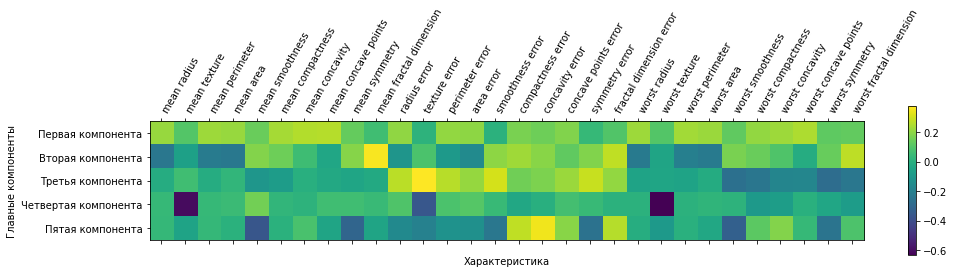

In [18]:
# узнать в каких пропорциях фичи сложились в главные компоненты
# не панацея, но может показать каие фичи важны в целом
# сначала обучим PCA на 5 компонент
pca_5 = PCA(n_components=5,
            whiten=True,
            random_state=42)
# сожмем данные о раке в 5 измерений
pca_5.fit(X_std_30)
# вывод теплокарты для компонент и фичей
plt.matshow(pca_5.components_,
            cmap='viridis')
plt.yticks([0, 1, 2, 3, 4],                   # метки
           ['Первая компонента',              # подписи
            'Вторая компонента',
            'Третья компонента',
            'Четвертая компонента',
            'Пятая компонента'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),  # количество фичей (30)
           cancer.feature_names,              # где брать названия
           rotation=60,                       # поворот текста
           ha='left')
plt.xlabel('\nХарактеристика')
plt.ylabel('Главные компоненты')
plt.show();

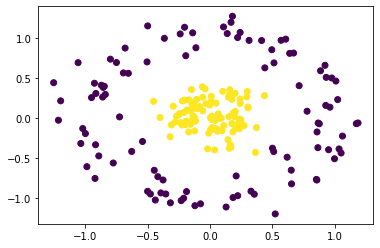

In [40]:
# а теперь ядерный PCA
# сначала данные
X_kpca, y_kpca = datasets.make_circles(n_samples=200,
                             noise=0.15,
                             factor=0.15,
                             random_state=42)
# печать
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kpca);

In [41]:
# стандартизация данных
scaler = StandardScaler()
X_std_kpca = scaler.fit_transform(X_kpca)

In [42]:
# созадние экземпляра
kpca = KernelPCA(n_components=None,              # не сжимам, только преобразуем
                 kernel='rbf',                   # или 'poly', 'rbf', 'sigmoid'
                 fit_inverse_transform=True,     # нужно для обратного преобразования
                                                 # без этого не откатит обратно
                 random_state=42)
# обучение
kpca.fit(X_std_kpca)
X_std_kpca = kpca.transform(X_std_kpca)

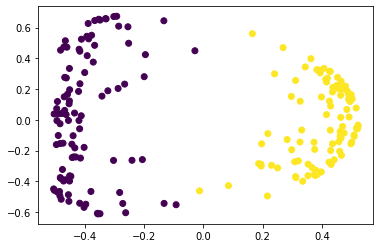

In [43]:
# печать - получили линейно разделимые данные
plt.scatter(X_std_kpca[:, 0], X_std_kpca[:, 1], c=y_kpca);

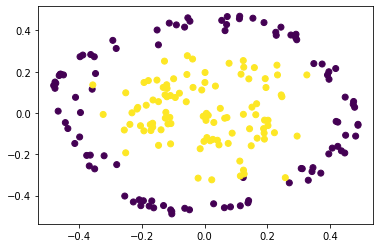

In [44]:
# попробуем разжать обратно
X_inv = kpca.inverse_transform(X_std_kpca)
plt.scatter(X_inv[:, 0], X_inv[:, 1], c=y_kpca);

In [45]:
# видно что получилось неточно, и это всего при 2 измерениях!